In [ ]:
#SENTIMENTAL ANALYSIS OF TWITTER TWEETS
#AUTHOR- ARNAV RAVIRAJ

In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

['negativewords', 'positivewords', 'clinton-trump-tweets']


In [2]:
tweets = pd.read_csv(r"../input/clinton-trump-tweets/tweets.csv")
#select columns
tweets = tweets[[ 'handle', 'text', 'is_retweet', 'original_author', 
                 'time', 'lang', 'retweet_count', 'favorite_count']]
    
tweets.head()

,handle,text,is_retweet,original_author,time,lang,retweet_count,favorite_count
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,en,218,651
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,en,2445,5308
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,en,7834,27234
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,en,916,2542
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,en,859,2882


In [3]:
from datetime import datetime
date_format = "%Y-%m-%dT%H:%M:%S" 
tweets["time"]   = pd.to_datetime(tweets["time"],format = date_format)
tweets["hour"]   = pd.DatetimeIndex(tweets["time"]).hour
tweets["month"]  = pd.DatetimeIndex(tweets["time"]).month
tweets["day"]    = pd.DatetimeIndex(tweets["time"]).day
tweets["month_f"]  = tweets["month"].map({1:"JAN",2:"FEB",3:"MAR",
                                        4:"APR",5:"MAY",6:"JUN",
                                        7:"JUL",8:"AUG",9:"SEP"})


def label_language(df) :
    if df["lang"] == "en" :
        return "English"
    elif df["lang"] == "es" :
        return "Spanish"
    else :
        return "Other"
tweets["lang"] = tweets.apply(lambda tweets:label_language(tweets),axis = 1)



tweets["tweets"] = tweets["text"]
import  re
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


def string_manipulation(df,column)  : 
    #extract hashtags
    df["hashtag"]  = df[column].str.findall(r'#.*?(?=\s|$)')
    #extract twitter account references
    df["accounts"] = df[column].str.findall(r'@.*?(?=\s|$)')
    
    #remove hashtags
    df[column] = df[column].str.replace(r'@.*?(?=\s|$)'," ")
    df[column] = df[column].str.replace(r'#.*?(?=\s|$)'," ")
    
    #convert to lower case
    df[column] = df[column].str.lower()
    #remove hyperlinks
    df[column] = df[column].apply(lambda x:re.split('https:\/\/.*',str(x))[0])
    #remove punctuations
    df[column] = df[column].str.replace('[^\w\s]'," ")
    #remove special characters
    df[column] = df[column].str.replace("\W"," ")
    df[column] = df[column].str.replace("\d+"," ")
    #remove under scores
    df[column] = df[column].str.replace("_"," ")
    #remove stopwords
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_words)]))
    return df

tweets = string_manipulation(tweets,"text")


#trump tweets without retweets
tweets_trump   = (tweets[(tweets["handle"] == "realDonaldTrump") &
                         (tweets["is_retweet"] == False)].reset_index()
                  .drop(columns = ["index"],axis = 1))

#trump tweets with retweets
tweets_trump_retweets   = (tweets[(tweets["handle"] == "realDonaldTrump") &
                                  (tweets["is_retweet"] == True)].reset_index()
                                  .drop(columns = ["index"],axis = 1))

#hillary tweets without retweets
tweets_hillary  = (tweets[(tweets["handle"] == "HillaryClinton") &
                            (tweets["is_retweet"] == False)].reset_index()
                              .drop(columns = ["index"],axis = 1))
tweets_hillary_retweets  = (tweets[(tweets["handle"] == "HillaryClinton") &
                            (tweets["is_retweet"] == True)].reset_index()
                              .drop(columns = ["index"],axis = 1))

display(tweets_trump.head(4).style.set_properties(**{}).set_caption("Trump tweets"))
display(tweets_hillary.head(4).style.set_properties(**{}).set_caption("Hillary tweets"))

,handle,text,is_retweet,original_author,time,lang,retweet_count,favorite_count,hour,month,day,month_f,tweets,hashtag,accounts
0,realDonaldTrump,join pm rally tomorrow mid america center council bluffs iowa tickets,False,nan,2016-09-27 22:13:24,English,2181,6172,22,9,27,SEP,"Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc",[],[]
1,realDonaldTrump,government people join movement today,False,nan,2016-09-27 21:08:22,English,4132,11239,21,9,27,SEP,"Once again, we will have a government of, by and for the people. Join the MOVEMENT today! https://t.co/lWjYDbPHav https://t.co/uYwJrtZkAe",[],[]
2,realDonaldTrump,hillary clinton campaign continues make false claims foundation disclosure,False,nan,2016-09-27 20:14:33,English,3833,9840,20,9,27,SEP,Hillary Clinton's Campaign Continues To Make False Claims About Foundation Disclosure: https://t.co/zhkEfUouHH,[],[]
3,realDonaldTrump,cnbc time magazine online polls say donald trump first presidential debate via,False,nan,2016-09-27 20:06:25,English,4236,10948,20,9,27,SEP,"'CNBC, Time magazine online polls say Donald Trump won the first presidential debate' via @WashTimes. #MAGA https://t.co/PGimqYKPoJ",['#MAGA'],['@WashTimes.']


,handle,text,is_retweet,original_author,time,lang,retweet_count,favorite_count,hour,month,day,month_f,tweets,hashtag,accounts
0,HillaryClinton,question election put plans action make life better,False,nan,2016-09-28 00:22:34,English,218,651,0,9,28,SEP,The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG,[],[]
1,HillaryClinton,stand together nothing make sure ready vote,False,nan,2016-09-27 23:08:41,English,916,2542,23,9,27,SEP,"If we stand together, there's nothing we can't do. Make sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy",[],[]
2,HillaryClinton,candidates asked confront racial injustice one real answer,False,nan,2016-09-27 22:30:27,English,859,2882,22,9,27,SEP,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis,[],[]
3,HillaryClinton,election important sit go,False,nan,2016-09-27 21:35:28,English,1303,2849,21,9,27,SEP,This election is too important to sit out. Go to https://t.co/tTgeqxNqYm and make sure you're registered. #NationalVoterRegistrationDay -H,['#NationalVoterRegistrationDay'],[]


In [4]:
positive_words = pd.read_csv(r"../input/positivewords/positive-words.txt",
                             header=None)

negative_words = pd.read_csv(r"../input/negativewords/negative-words.txt",
                             header=None,encoding='latin-1')


In [5]:
def convert_words_list(df) : 
    words = string_manipulation(df,0)
    words_list = words[words[0] != ""][0].tolist()
    return words_list

positive_words_list = convert_words_list(positive_words)

#remove word trump from positive word list
positive_words_list = [i for i in positive_words_list if i not in "trump"]
negative_words_list = convert_words_list(negative_words)

print ( "positive words : " )
print (positive_words_list[:50])
print ( "negative words : " )
print (negative_words_list[:50])

positive words : 
['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously']
negative words : 
['faced', 'faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive

In [6]:
def scoring_tweets(data_frame,text_column) :
    #identifying +ve and -ve words in tweets
    data_frame["positive"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split() 
                                                                              if i in (positive_words_list)]))
    data_frame["negative"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split()
                                                                              if i in (negative_words_list)]))
    #scoring
    data_frame["positive_count"] = data_frame["positive"].str.split().str.len()
    data_frame["negative_count"] = data_frame["negative"].str.split().str.len()
    data_frame["score"]          = (data_frame["positive_count"] -
                                    data_frame["negative_count"])
    
    #create new feature sentiment :
    #+ve if score is +ve , #-ve if score is -ve , # neutral if score is 0
    def labeling(data_frame) :
        if data_frame["score"]   > 0  :
            return "positive"
        elif data_frame["score"] < 0  :
            return "negative"
        elif data_frame["score"] == 0 :
            return "neutral"
    data_frame["sentiment"] = data_frame.apply(lambda data_frame:labeling(data_frame),
                                               axis = 1)
    return data_frame

tweets         = scoring_tweets(tweets,"text")
tweets_trump   = scoring_tweets(tweets_trump,"text")
tweets_hillary = scoring_tweets(tweets_hillary,"text")

tweets[["text","positive","negative","positive_count",
              "negative_count","score","sentiment"]].head()

,text,positive,negative,positive_count,negative_count,score,sentiment
0,question election put plans action make life b...,better,,1,0,1,positive
1,last night donald trump said paying taxes smar...,smart,,1,0,1,positive
2,proud vision command last night debate showed ...,proud ready,,2,0,2,positive
3,stand together nothing make sure ready vote,ready,,1,0,1,positive
4,candidates asked confront racial injustice one...,,confront injustice,0,2,-2,negative


In [7]:
score_dist = tweets[tweets["is_retweet"] ==
                    False].groupby("handle")["score"].value_counts().to_frame()
score_dist.columns = ["count"]
score_dist = score_dist.reset_index().sort_values(by = "score",ascending = False)

trace = go.Bar(x = score_dist[score_dist["handle"] == "realDonaldTrump"]["score"],
               y = score_dist[score_dist["handle"] == "realDonaldTrump"]["count"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "red"),name = "Donald Trump"
              )

trace1 = go.Bar(x = score_dist[score_dist["handle"] == "HillaryClinton"]["score"],
                y = score_dist[score_dist["handle"] == "HillaryClinton"]["count"],
                marker = dict(line = dict(width = 1,color = "black"),
                             color = "blue"),name = "Hillary Clinton"
              )
layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )
fig = go.Figure(data = [trace,trace1],layout = layout)
py.iplot(fig)


In [8]:
sent_dist = pd.crosstab(tweets[tweets["is_retweet"] == 
                               False]["sentiment"],
                        tweets[tweets["is_retweet"] ==
                               False]["handle"]).apply(lambda r:
                                                       r/r.sum()*100,axis = 0)

sent_dist = sent_dist.reset_index()
t1 = go.Bar(x = sent_dist["sentiment"],y = sent_dist["HillaryClinton"],
            name = "Hillary Clinton",
            marker = dict(line = dict(width = 1,color = "#000000"),color = "#6666FF"))

t2 = go.Bar(x = sent_dist["sentiment"],y = sent_dist["realDonaldTrump"],
           name = "Donald Trump",
           marker = dict(line = dict(width = 1,color = "#000000"),color = "#FF3300"))

layout = go.Layout(dict(title = "Sentiment distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2,title = "sentiment"),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2,title = "percentage"),
                        )
                  )
fig = go.Figure(data = [t1,t2],layout = layout)
py.iplot(fig)

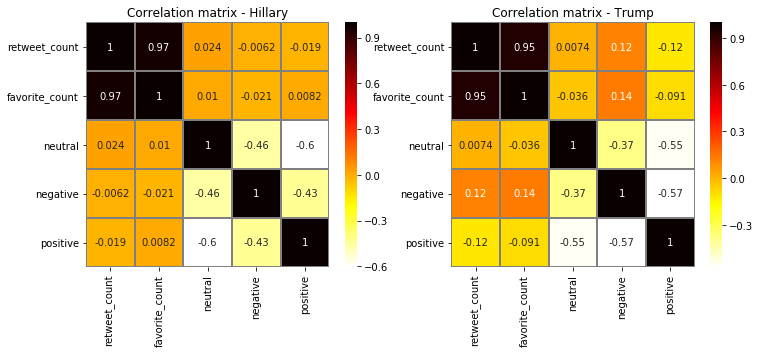

In [9]:
df_corr = tweets[tweets["is_retweet"] == False][[ 'retweet_count', 'favorite_count' ,
                        'score', "sentiment","handle" ]]

df_corr["neutral"]   = np.where(df_corr["score"] == 0,1,0)
df_corr["negative"]  = np.where(df_corr["score"] <  0,1,0) 
df_corr["positive"]  = np.where(df_corr["score"] >  0,1,0)

cols = ['retweet_count','favorite_count','neutral','negative', 'positive']

correlation_hillary  = df_corr[df_corr["handle"] == "HillaryClinton"][cols].corr()
correlation_trump    = df_corr[df_corr["handle"] == "realDonaldTrump"][cols].corr()

plt.figure(figsize = (12,4.5))
plt.subplot(121)
sns.heatmap(correlation_hillary,annot = True,cmap = "hot_r",
            linecolor = "grey",linewidths = 1)
plt.title("Correlation matrix - Hillary")

plt.subplot(122)
sns.heatmap(correlation_trump,annot = True,cmap = "hot_r",
            linecolor = "grey",linewidths = 1)
plt.title("Correlation matrix - Trump")
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def return_dtm(df,column) :
    
    documents  = df[column].tolist()
    vectorizer = CountVectorizer()
    vec        = vectorizer.fit_transform(documents)
    dtm  = pd.DataFrame(vec.toarray(),columns = vectorizer.get_feature_names())
    dtm  = df[[column,"sentiment"]].merge(dtm,left_index = True,
                                          right_index = True,how = "left")
    dtm["sentiment"]  = dtm["sentiment"].map({"neutral" : 1,"positive" : 2,
                                          "negative" : 3})  
    
    return dtm

dtm_trump    = return_dtm(tweets_trump,"text")
dtm_hillary  = return_dtm(tweets_hillary,"text")
dtm_hillary  = dtm_hillary.rename(columns = {"text_x" : "text"})



display(dtm_trump.head(3).style.set_properties(**{}).set_caption("DTM - Trump"))
display(dtm_hillary.head(3).style.set_properties(**{}).set_caption("DTM - Hillary"))

,text,sentiment,abandon,abandoned,abc,abdeslam,aberdeen,ability,abingdon,able,aboard,abolish,abroad,absentee,absolute,absolutely,abuser,accept,acceptable,acceptance,accepted,access,accomplished,according,account,accounts,accurate,achieve,acid,acing,across,act,acted,acting,action,active,activity,acts,actually,ad,adam,add,added,adding,additional,additionally,address,adelson,administration,admire,admit,admonished,adore,ads,adv,advance,advantage,advertisers,advertising,advice,advise,advisers,advisors,advisory,affected,affection,afraid,african,afternoon,agenda,agent,agents,ages,aggressively,agnstt,ago,agree,agreed,agreeing,agreement,agrees,ahead,aid,aig,ailes,ailsa,air,airbus,aired,airing,airplane,airport,airports,airtime,airwaves,akbar,akron,al,alabama,albany,aldridge,alejandro,alex,ali,aliens,alike,alive,allah,allen,alliance,allies,allis,allow,allowed,allowing,allows,almost,alone,along,alongside,already,also,altogether,alvarez,always,amazing,amazingly,ambassador,ame,amendment,amercan,america,american,americanism,americans,americas,ames,amnesty,among,amount,amounts,amp,anaheim,analysis,anchor,anchored,anchors,anderson,andrew,anger,angry,ann,anniversary,announce,announced,announcement,announcer,announcers,annual,anonymous,another,answer,answered,answering,answers,anthony,anti,anticipated,antics,antonin,anybody,anymore,anyone,anything,anyway,ap,apart,apologize,apologized,apology,app,appeal,appear,apple,appleton,application,appointed,appointments,appreciate,appreciated,appreciation,approval,approve,approved,approx,approximately,april,arabia,area,arena,arg,argued,argument,arizona,arkansas,arm,armed,arms,army,arnold,around,arpaio,arranged,arrested,arrival,arrive,arrived,arriving,article,asap,ashamed,asheville,asia,ask,asked,asking,ass,assault,assaulted,assaulting,assembled,assets,association,assume,assure,ate,athletic,atlanta,atlantic,attack,attacked,attacks,attempt,attend,attended,attending,attorney,audience,audit,audited,august,augusta,austin,author,authorities,authorized,available,average,aviv,avoid,aware,awareness,away,awesome,awkward,az,baby,back,backed,backing,backstop,bad,bader,badly,bag,baghdad,baiting,bakari,balanced,ball,ballot,ballots,baltimore,ban,bandits,bandwidth,bangladesh,bangor,bank,bankrupt,bankruptcies,bankrupted,banks,banned,bar,barack,barbara,barbaro,barely,barrack,barrasso,barre,barrel,barron,base,baseball,based,bash,bashing,basis,basket,baton,battlefield,bay,beach,beans,bear,beat,beaten,beating,beats,beautiful,beauty,became,beck,becki,become,becoming,bed,beg,begala,began,begged,begging,beginning,begins,behalf,behar,behaved,behavior,behind,beholden,belief,beliefs,believable,believe,believes,believing,belittle,belong,belongs,beloved,belt,ben,bend,benefactor,benefit,benefitted,benghazi,benjamin,berglund,bernie,berniesanders,berrien,best,bethpage,betray,betrayed,better,beyond,bias,biased,bible,biden,big,bigger,biggest,bigot,biker,bikers,bill,billion,billionaire,billions,bills,bimbo,binding,bio,birth,birthday,birther,birthright,bishop,biz,black,blacks,blah,blake,blame,blamed,blames,blank,blasted,blaze,bleeding,bless,blew,block,blocked,blood,bloomberg,blow,blown,blue,bluffs,board,boarding,boards,boat,bob,bobby,bodyguards,bomb,bombed,bombing,bombshell,bongino,booed,book,booker,books,border,borderless,borders,boring,born,borrow,borrowing,boss,bosses,bottom,bought,bowl,bowls,box,boxes,boxing,boy,boycott,boys,bp,brain,brainpower,brainwashed,brand,brave,bravely,bravery,breach,breakdown,breakfast,breaking,breitbart,brewer,brexit,brian,bribe,bribery,bridgeport,briefings,brigade,bright,brigid,brilliant,brilliantly,bring,bringing,brings,britain,british,broadcast,broadcasting,broke,broken,brooks,brother,brothers,brought,bruising,bruni,brussels,bs,bubba,buchanan,buckley,budget,buffalo,build,building,built,bull,bullied,bully,bureau,burlington,burn,burned,burning,bury,bush,bushy,business,businessman,bust,busted,busy,button,buy,buyer,buyers,bye,byrd,byrne,cable,cadillac,caesars,cake,cal,california,call,called,calling,calls,calm,came

,text,sentiment,abandon,abandoned,abbott,abierta,abilities,ability,able,abolish,abortion,abroad,absolute,absolutely,absurd,abuse,abusive,abusos,acaba,accept,acceptance,accepted,accepting,accepts,access,acciones,accomplished,according,account,accountable,accuse,accused,accuses,acerque,achieve,achieved,acknowledge,acknowledging,across,act,action,actions,activist,activists,acto,actors,actual,actually,actuar,ad,add,added,addiction,address,addressed,addresses,addressing,adds,adelante,adha,admiration,admire,admired,admit,admitted,adopt,adopted,adoption,ads,adults,advanced,advantage,advice,adviser,advising,advisor,advisors,advocate,advocated,advocating,afectadas,afectados,affect,affected,affecting,affects,afford,affordable,afgano,afghan,afraid,african,afroamericanas,ag,age,agenda,ago,agree,agreed,agreement,ahead,ahora,aid,aidan,aids,aimed,air,airports,aisle,akonjee,al,alarming,alcohol,aleatha,alguien,alguna,alguno,ali,alicia,alienates,alive,allegations,allegedly,alleys,allies,allow,allowed,allows,ally,almost,alone,along,alongside,already,also,alt,alternative,although,altogether,alton,always,aly,alza,alzheimer,amar,ambiguity,ame,amendment,america,american,americano,americans,amigos,among,amount,amp,anastasia,andrew,angeles,anger,angry,animal,animals,ann,anne,anniversary,announce,announced,annual,anomaly,another,answer,answered,answers,antes,anthony,anti,anuncia,anxious,anybody,anymore,anyone,anything,anyway,anywhere,apart,apartments,apologize,apology,apoyar,apoyo,app,appalachia,appalled,appalling,apparent,appeal,appealing,appeals,appearance,appeared,applaud,applications,apply,applying,appointed,apprentice,apprenticeship,apprenticeships,approach,approve,approved,approves,aprobar,aprobemos,aquellos,aquí,ar,arabia,arc,architect,arena,argued,arkansas,armandina,armed,army,around,arpaio,arrangement,arsenal,art,ash,asian,asinine,ask,asked,asking,aspect,aspiring,assassination,assault,asset,assigned,astonishing,astrid,astronaut,así,ataque,athlete,athletes,atlantic,attack,attacked,attacking,attacks,attempting,attend,attending,attention,attitude,attitudes,attorney,audit,august,aumento,aunt,auriemma,auto,available,average,avoid,away,awe,awful,awkward,ayer,ayudando,ayudes,año,años,babies,baby,back,backbone,backed,background,backgrounds,backing,backpedal,backs,backstage,backup,backward,backwards,backyard,bad,badly,baghdad,bail,bailouts,bait,bajo,balance,ball,balloon,balloons,ballot,ban,bancarrota,bangladesh,banished,bank,bankrupt,bankruptcies,bankruptcy,bankrupted,bankrupting,banks,banned,banner,banning,baptize,barack,barber,bargain,barker,barrier,barriers,based,basic,basically,basis,bat,bathrooms,baton,battle,battlefield,beat,beau,beautiful,became,become,becomes,becoming,bedrock,bedtime,beer,began,begin,beginning,begins,begrudge,behalf,behavior,behind,beijing,beings,belgium,belief,beliefs,believe,believed,believes,believing,belittling,belong,belongs,beloved,bend,bends,benediction,beneficiarse,benefit,benefited,benefits,bernardino,bernie,best,betray,betrays,betsy,better,beyond,bias,biden,bidens,big,biggest,bigot,bigoted,bigotry,biles,bill,billie,billion,billionaires,bills,bin,binder,biologist,birth,birthday,birther,birtherism,birthplace,birthright,bit,bizarre,black,blame,blanca,bland,blankenship,blast,blatantly,blazed,bled,bless,blessed,block,blocking,blog,blow,blown,bluster,board,boards,boasts,bob,bobby,bold,bomb,bombast,bombing,bonus,bonuses,boo,booing,book,booker,books,borde,border,born,borrow,borrowed,boss,boston,bottles,bottom,bought,boundaries,boundless,bounds,bow,bowl,box,brag,bragging,brags,brain,branch,brave,bravo,break,breaking,breaks,breakthroughs,breast,breath,breathe,breitbart,bribed,bridge,bridges,bright,brighter,brilliance,bring,bringing,brings,brink,broadly,broke,broken,brooklyn,brother,brothers,brought,brown,brutal,buck,buckles,budget,build,builders,building,built,bulldozed,bullies,bully,bullying,bunch,burying,bus,busey,bush,business,businesses,businessman,busting,busy,button,buy,buying,buys,bye,ca,cabinet,cable,cada,calculator,cal

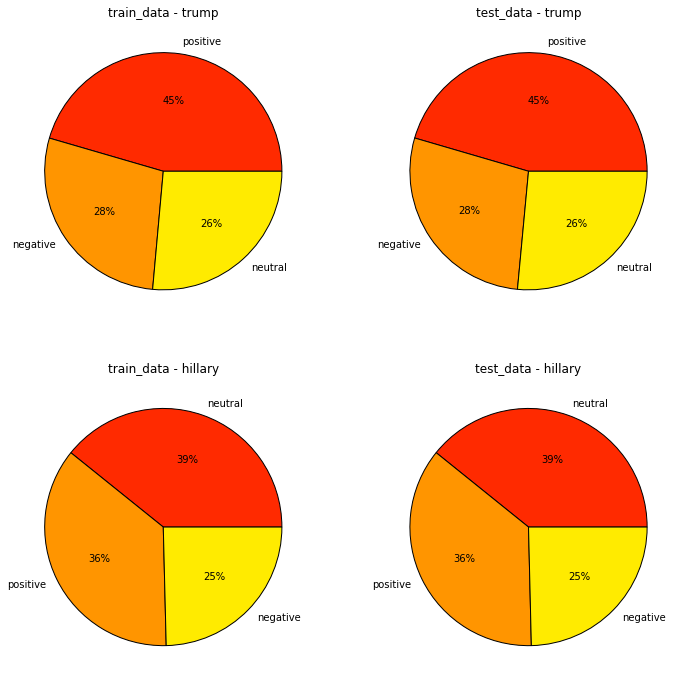

In [11]:
from sklearn.model_selection import train_test_split
import itertools

def split_data(dtm_df) :
    
    #dependent and independent variables
    predictors = [i for i in dtm_df.columns if i not in ["text"] + ["sentiment"]]
    target     = "sentiment"
    
    #split
    train,test = train_test_split(dtm_df,test_size = .25,
                                  stratify = dtm_df[["sentiment"]],
                                  random_state  = 123)
    
    train_X = train[predictors]
    train_Y = train[target]
    test_X  = test[predictors]
    test_Y  = test[target]
    
    return train_X,train_Y,test_X,test_Y

train_X_trp,train_Y_trp,test_X_trp,test_Y_trp = split_data(dtm_trump)
train_X_hil,train_Y_hil,test_X_hil,test_Y_hil = split_data(dtm_hillary)
x      = [train_Y_trp,test_Y_trp,train_Y_hil,test_Y_hil]
titles = ["train_data - trump","test_data - trump",
          "train_data - hillary","test_data - hillary"]

plt.figure(figsize = (12,12))
for i,j,k in itertools.zip_longest(x,range(len(x)),titles) :
    plt.subplot(2,2,j+1)
    counts = i.value_counts().reset_index()
    counts.columns = ["sentiment","count"]
    counts["sentiment"] = counts["sentiment"].map({1 : "neutral",2 : "positive" ,
                                                    3 : "negative" }) 
    plt.pie(x = counts["count"] ,labels = counts["sentiment"],autopct  = "%1.0f%%",
            wedgeprops = {"linewidth" : 1,"edgecolor" : "black"},
            colors = sns.color_palette("prism",4))
    plt.title(k)
